In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_excel('covid-hospitalizations-1.xlsx')
df

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
110447,United States,USA,2022-01-10,Daily ICU occupancy per million,73.322
110448,United States,USA,2022-01-10,Daily hospital occupancy,141539.000
110449,United States,USA,2022-01-10,Daily hospital occupancy per million,425.150
110450,United States,USA,2022-01-10,Weekly new hospital admissions,145049.000


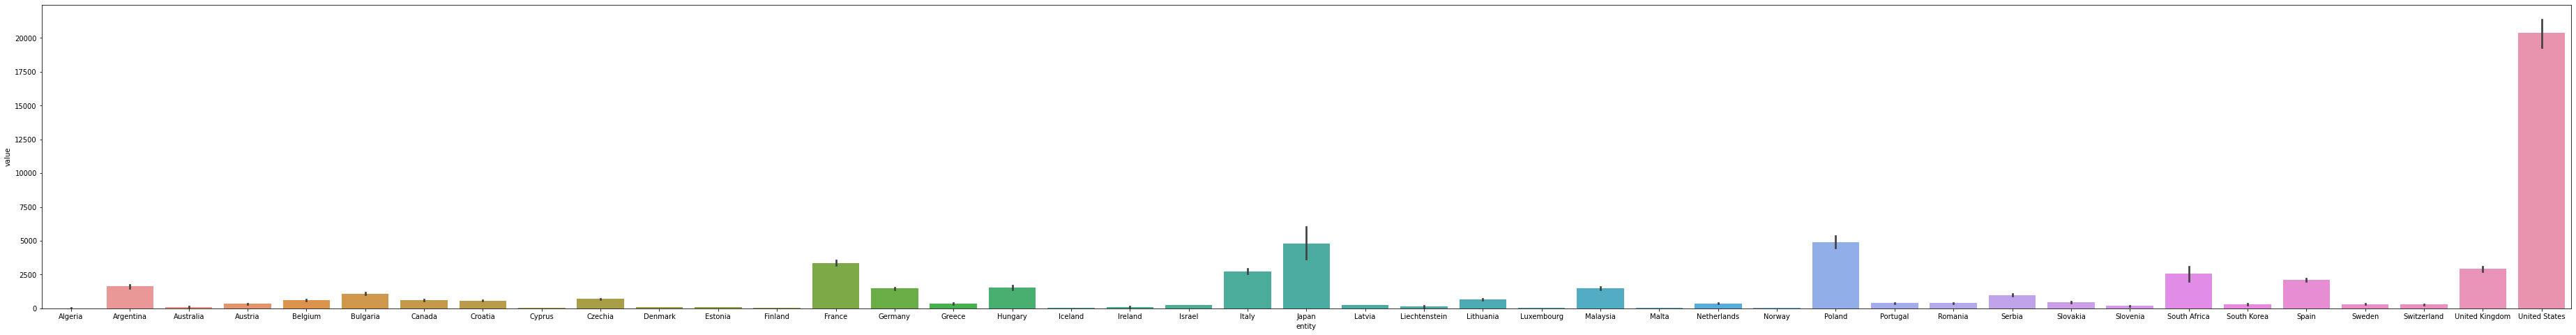

In [ ]:
plt.figure(figsize=(65,8))
sns.barplot(x='entity',y='value',data=df)

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
df['date']=pd.to_datetime(df['date'])

Change the data type of date column to string from date.

In [ ]:
df['date']=df['date'].dt.strftime('%d-%m-%Y')
df['date'].dtype

dtype('O')

Combine entity and date column into a column which name is 'content'

In [ ]:
df['content']=df['entity']+' : '+df['date']+' : '+df['indicator']

Dependent & Independent splitting

In [ ]:
df

,entity,iso_code,date,indicator,value,content
0,Algeria,DZA,17-07-2020,Daily ICU occupancy,62.000,Algeria : 17-07-2020 : Daily ICU occupancy
1,Algeria,DZA,17-07-2020,Daily ICU occupancy per million,1.390,Algeria : 17-07-2020 : Daily ICU occupancy per...
2,Algeria,DZA,18-07-2020,Daily ICU occupancy,67.000,Algeria : 18-07-2020 : Daily ICU occupancy
3,Algeria,DZA,18-07-2020,Daily ICU occupancy per million,1.502,Algeria : 18-07-2020 : Daily ICU occupancy per...
4,Algeria,DZA,20-07-2020,Daily ICU occupancy,64.000,Algeria : 20-07-2020 : Daily ICU occupancy
...,...,...,...,...,...,...
110447,United States,USA,10-01-2022,Daily ICU occupancy per million,73.322,United States : 10-01-2022 : Daily ICU occupan...
110448,United States,USA,10-01-2022,Daily hospital occupancy,141539.000,United States : 10-01-2022 : Daily hospital oc...
110449,United States,USA,10-01-2022,Daily hospital occupancy per million,425.150,United States : 10-01-2022 : Daily hospital oc...
110450,United States,USA,10-01-2022,Weekly new hospital admissions,145049.000,United States : 10-01-2022 : Weekly new hospit...


In [ ]:
x=list(df['content'])
CV=CountVectorizer()
CVx=CV.fit_transform(x)
y=df['value']

Train & Test Data Splitting

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(CVx,y,test_size=0.30,random_state=1)

Linear Regression

R Squared Value= 0.3287450826550241
Mean Squared Error= 27008243.680037577
Mean Absolute Error= 2166.276250957961


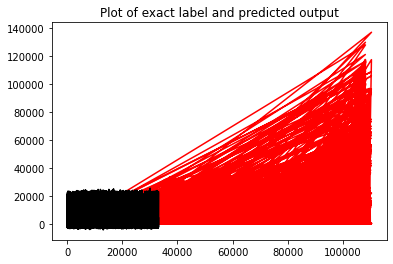

In [ ]:
Reg=LinearRegression()
Reg.fit(xtrain,ytrain)
Pred=Reg.predict(xtest)
plt.title("Plot of exact label and predicted output")
plt.plot(ytest,color='red')
plt.plot(Pred,color='black')
print("R Squared Value=",r2_score(ytest,Pred))
print("Mean Squared Error=",mean_squared_error(ytest,Pred))
print("Mean Absolute Error=",mean_absolute_error(ytest,Pred))

Random Forest Regressor

R Squared Value= 0.8724683917560192
Mean Squared Error= 5131291.649950553
Mean Absolute Error= 403.1811093369883


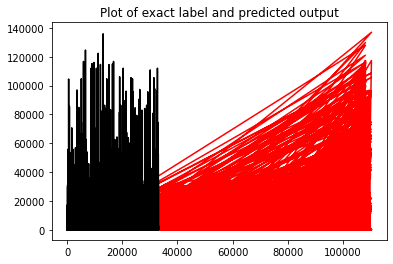

In [ ]:
Forest=RandomForestRegressor(n_estimators=25)
Forest.fit(xtrain,ytrain)
Pred=Forest.predict(xtest)
plt.title("Plot of exact label and predicted output")
plt.plot(ytest,color='red')
plt.plot(Pred,color='black')
print("R Squared Value=",r2_score(ytest,Pred))
print("Mean Squared Error=",mean_squared_error(ytest,Pred))
print("Mean Absolute Error=",mean_absolute_error(ytest,Pred))

Decision Tree Regressor

R Squared Value= 0.8121085964514084
Mean Squared Error= 7559895.177373661
Mean Absolute Error= 473.97279329128446


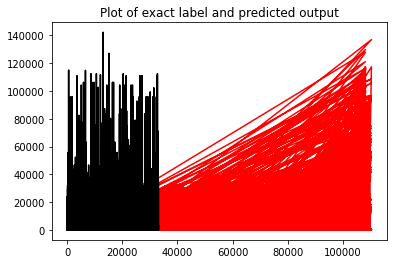

In [ ]:
Tree=DecisionTreeRegressor()
Tree.fit(xtrain,ytrain)
Pred=Tree.predict(xtest)
plt.title("Plot of exact label and predicted output")
plt.plot(ytest,color='red')
plt.plot(Pred,color='black')
print("R Squared Value=",r2_score(ytest,Pred))
print("Mean Squared Error=",mean_squared_error(ytest,Pred))
print("Mean Absolute Error=",mean_absolute_error(ytest,Pred))

K-Neighbors Regressor

R Squared Value= 0.7004161596827684
Mean Squared Error= 12053890.635010356
Mean Absolute Error= 1022.3140173580395


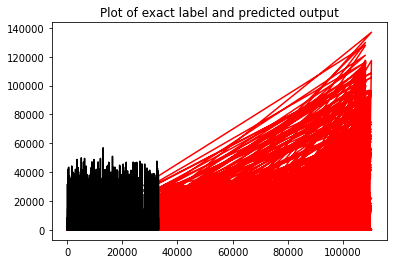

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=125)
KNN.fit(xtrain,ytrain)
Pred=KNN.predict(xtest)
plt.title("Plot of exact label and predicted output")
plt.plot(ytest,color='red')
plt.plot(Pred,color='black')
print("R Squared Value=",r2_score(ytest,Pred))
print("Mean Squared Error=",mean_squared_error(ytest,Pred))
print("Mean Absolute Error=",mean_absolute_error(ytest,Pred))

Combine Accuracy Table for All Algorithms 

In [ ]:
Algo=[Reg,KNN,Tree,Forest]
MSE=[]
MAE=[]
R2=[]
for K in Algo:
  K.fit(xtrain,ytrain)
  Pred=K.predict(xtest)
  R2.append(r2_score(ytest,Pred))
  MSE.append(mean_squared_error(ytest,Pred))
  MAE.append(mean_absolute_error(ytest,Pred))
Algo_name=pd.DataFrame(["Reg","KNN","Tree","Forest"],columns=['Algorithms'])
MSE=pd.DataFrame(MSE,columns=['Mean Squared Error'])
MAE=pd.DataFrame(MAE,columns=['Mean Absolute Error'])
R2=pd.DataFrame(R2,columns=['R Squared Value'])
Table=pd.concat([Algo_name,R2],axis=1)
Table=pd.concat([Table,MAE],axis=1)
Table=pd.concat([Table,MSE],axis=1)
Table

,Algorithms,R Squared Value,Mean Absolute Error,Mean Squared Error
0,Reg,0.328745,2166.276251,2.700824e+07
1,KNN,0.700416,1022.314017,1.205389e+07
2,Tree,0.811998,474.058515,7.564350e+06
3,Forest,0.875789,402.223464,4.997689e+06


Evolution

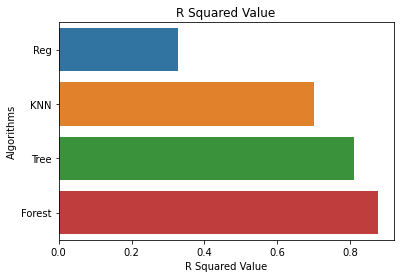

In [ ]:
plt.title("R Squared Value")
sns.barplot(x='R Squared Value',y='Algorithms',data=Table)

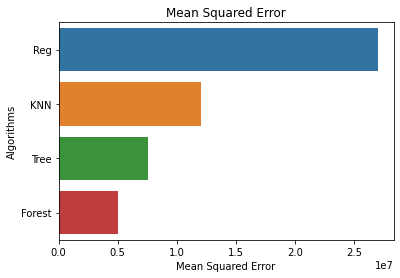

In [ ]:
plt.title("Mean Squared Error")
sns.barplot(x='Mean Squared Error',y='Algorithms',data=Table)

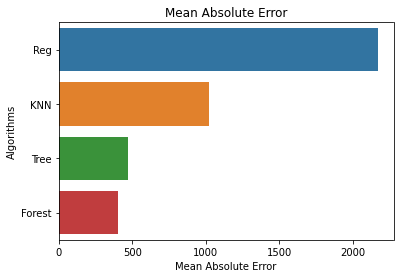

In [ ]:
plt.title("Mean Absolute Error")
sns.barplot(x='Mean Absolute Error',y='Algorithms',data=Table)

In [ ]:
Forest.fit(xtrain,ytrain)
text=str(input("enter your input:"))
print("Predicted Value=",Forest.predict(CV.transform([text])))

enter your input:Algeria : 17-07-2020 : Daily ICU occupancy per million	
Predicted Value= [1.39852]
